## In this project we will build a  Card perspective transformation by image and video​ 
## We will go through 4 tasks to implement our project:

### Task 1: Importing libraries 

### Task 2: Read the Image and make a pluring and morphological transformation

### Task3: Build a Bird View for image

### Task4 :Build a Bird View for video

### Task 1: Importing libraries 


In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

#### Task 2: Read the Image and make a pluring and morphological transformation


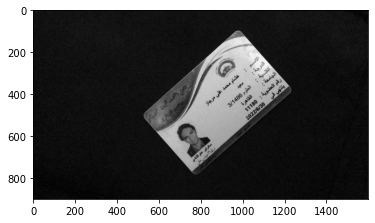

In [2]:
img = cv2.imread('card.jpeg',0)  # 0 For Gray scale
plt.imshow(img ,'gray')

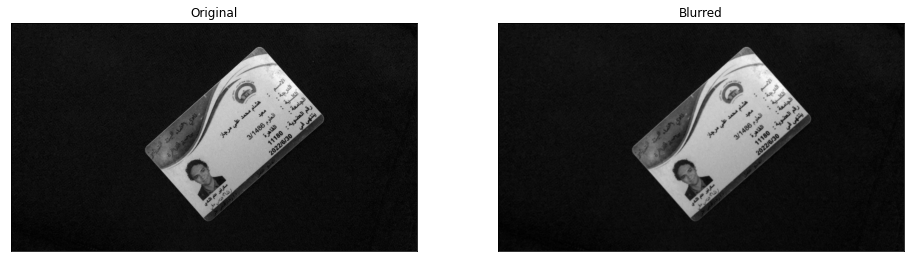

In [3]:
blur = cv2.GaussianBlur(img,(5,5),1) #bluring
plt.figure(figsize=(16, 12))

plt.subplot(121),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

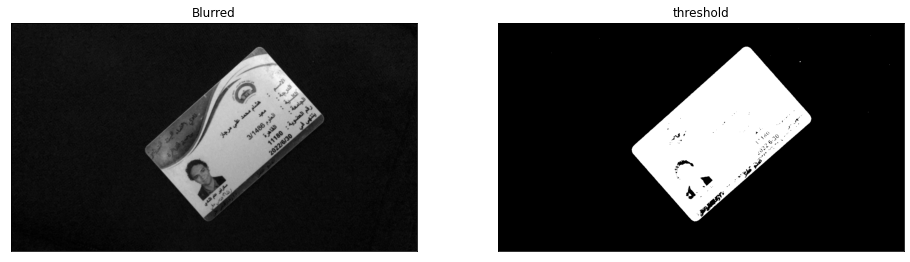

In [4]:
ret,thresh1 = cv2.threshold(blur,30,255,cv2.THRESH_BINARY) #binary threshold
plt.figure(figsize=(16, 12))


plt.subplot(121),plt.imshow(blur,'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh1,'gray'),plt.title('threshold')
plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
kernel = np.ones((31,31),np.uint8) #make Kernal

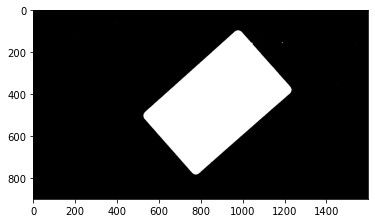

In [6]:
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel) #Closing (Dilation + Erosion)
plt.imshow(closing ,'gray')

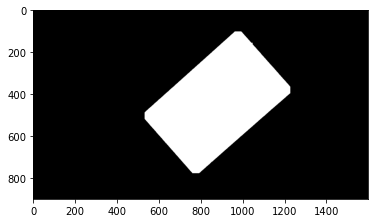

In [7]:
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel) #opening (Erosion + Dilation)
plt.imshow(opening ,'gray')

### Task3: Build a Bird View for image


In [8]:
(y,x)=np.where(opening==255)
p1=(x[0],y[0])
p2=(x[-1],y[-1])
index_min=np.where(x==min(x))
p3=(min(x),max(y[index_min]))
index_max=np.where(x==min(x))
p4=(max(x),max(y[index_max]))

In [9]:
p1

(964, 102)

In [10]:
p2

(793, 777)

In [11]:
p3

(533, 518)

In [12]:
p4

(1228, 518)

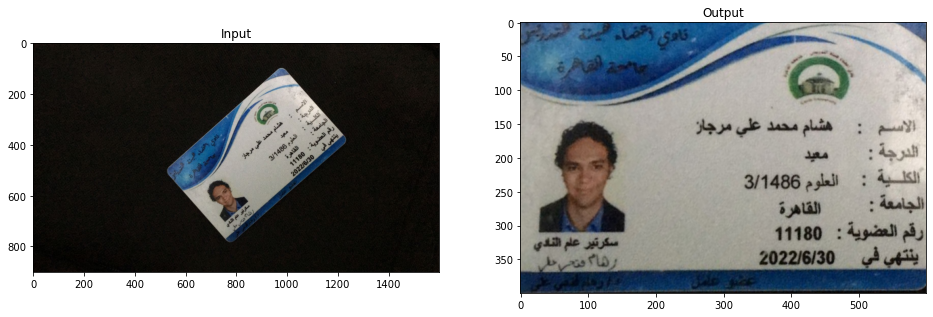

In [13]:
img=cv2.imread('card.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pts1 = np.float32([[533,518],[990,102],[793,777],[1240,390]])
pts2 = np.float32([[0,0],[600,0],[0,400],[600,400]])
M= cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(600,400))
plt.figure(figsize=(16, 12))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


### Task4 :Build a Bird View for video

In [14]:
cap =cv2.VideoCapture('cardvedio.mp4') #read video

In [15]:
while(1):
    ret,frame = cap.read()  # reading each frame : ret is a boolean if reading is done correctly or not , frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray,(5,5),1)
    ret,thresh1 = cv2.threshold(blur,30,255,cv2.THRESH_BINARY)
    kernel = np.ones((31,31),np.uint8)
    closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    
    (y,x)=np.where(opening==255)
    p1=(x[0],y[0])
    p2=(x[-1],y[-1])
    index_min=np.where(x==min(x))
    p3=(min(x),max(y[index_min]))
    index_max=np.where(x==min(x))
    p4=(max(x),max(y[index_max]))
    


    pts1 = np.float32([p3,p1,p2,p4])
    pts2 = np.float32([[0,0],[600,0],[0,400],[600,400]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(frame,M,(625,400))
    cv2.imshow('origenal',frame)    
    cv2.imshow('Card prospictive',dst)    
    if cv2.waitKey(1000) & 0xFF == ord('q'):# 0xFF is a hexadecimal constant which is 11111111 in binary.
        break                             # By using bitwise AND (&) with this constant,                                               
cap.release()                             # it leaves only the last 8 bits of the original
cv2.destroyAllWindows()      

### End project